In [1]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy import special

In [86]:
def gen():
    return int(np.random.random() * 10**6)

# 1

In [55]:
n = 10**3
np.random.seed(42)

In [87]:
sample_uniform = np.random.uniform(-np.sqrt(3), np.sqrt(3), n)
sample_normal = np.random.normal(0, 1, n)
sample_exponential = stats.expon(scale=1, loc=-1).rvs(size=n, random_state=gen())

In [26]:
pd.DataFrame({
    'mean' : [np.mean(sample) for sample in [sample_uniform, sample_normal, sample_exponential]],
    'variance' : [np.var(sample) for sample in [sample_uniform, sample_normal, sample_exponential]]
}, index=['uniform', 'normal', 'exponential'])

,mean,variance
uniform,0.069756,1.077528
normal,-0.551317,0.604221
exponential,0.026970,0.776851


# 2

In [5]:
q = 0.95

In [57]:
def get_intervals(sample, q):
    m = np.mean(sample)
    D = np.var(sample)
    n = sample.size

    normal_interval = (
        m + stats.norm.ppf((1 - q) / 2) * np.sqrt(D / n),
        m + stats.norm.ppf((1 + q) / 2) * np.sqrt(D / n),
    )

    student_interval = (
        m + special.stdtrit(n - 1, (1 - q) / 2) * np.sqrt(D / n),
        m + special.stdtrit(n - 1, (1 + q) / 2) * np.sqrt(D / n)
    )

    a, b = sample.min(), sample.max()
    k_q = special.smirnovi(n, q)

    hora_interval = (
        m - (b - a) * k_q, m + (b - a) * k_q
    )

    return [normal_interval, student_interval, hora_interval]


In [118]:
special.smirnovi(32, 1 - 2 / np.e)

np.float64(0.1392573141208471)

In [40]:
get_intervals(sample_uniform, 0.95)

[(np.float64(-0.6223919553288377), np.float64(1.0546085951803834)),
 (np.float64(-0.9716941107826644), np.float64(1.4039107506342103)),
 (np.float64(0.09950833933175801), np.float64(0.3327083005197878))]

In [13]:
get_intervals(sample_normal, 0.95)

[(np.float64(0.03763289437631624), np.float64(0.1601587415206694)),
 (np.float64(0.03755858119097986), np.float64(0.16023305470600577)),
 (np.float64(0.06892969339986922), np.float64(0.1288619424971164))]

In [58]:
intervals = get_intervals(sample_exponential, 0.95)
intervals

[(np.float64(-0.08773958628768652), np.float64(0.032751482218135265)),
 (np.float64(-0.0878126653588698), np.float64(0.03282456128931853)),
 (np.float64(-0.06752333907058494), np.float64(0.012535235001033679))]

# 3

In [90]:
def calc_q_exp(intervals, N=10**3):
    N = 10**3
    in_interval_counts = np.zeros(3)

    for i in range(N):
        sample_exponential_exp = stats.expon(scale=1, loc=-1).rvs(size=n, random_state=i)
        exponential_mean_exp = np.mean(sample_exponential_exp)

        in_interval = np.array([
            int(interval[0] <= exponential_mean_exp <= interval[1]) for interval in intervals
        ])

        in_interval_counts += in_interval

    return in_interval_counts / N

In [91]:
calc_q_exp(intervals)

array([0.85 , 0.85 , 0.652])

# 4

In [92]:
n_arange = np.array([
    20, 50, 100, 250, 500, 1000
])

In [115]:
def get_method_info(generator):
    probs_per_n = []
    for n in n_arange:
        sample_exponential_exp = generator(size=n)
        intervals = get_intervals(sample_exponential_exp, 0.95)
        probs = calc_q_exp(intervals)

        probs_per_n.append(probs)

    data = pd.DataFrame(np.array(probs_per_n), columns=['x', 'y', 'z'])
    data['n'] = n_arange

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='n', y='x', marker='o', markersize=5, label="Normal method's Q*")
    sns.lineplot(data=data, x='n', y='y', marker='o', markersize=5, label="T-Student method's Q*")
    sns.lineplot(data=data, x='n', y='z', marker='o', markersize=5, label="Hora-Hora method's Q*")

    plt.title("Q* : Sample size")
    plt.xlabel("Sample size")
    plt.ylabel("Q*")
    plt.show();


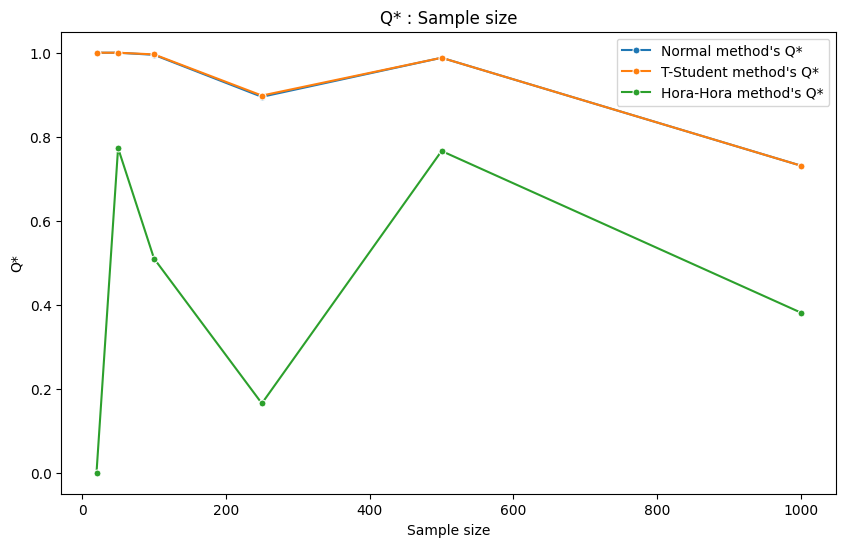

In [116]:
get_method_info(lambda size : stats.expon(scale=1, loc=-1).rvs(size=size, random_state=gen()))

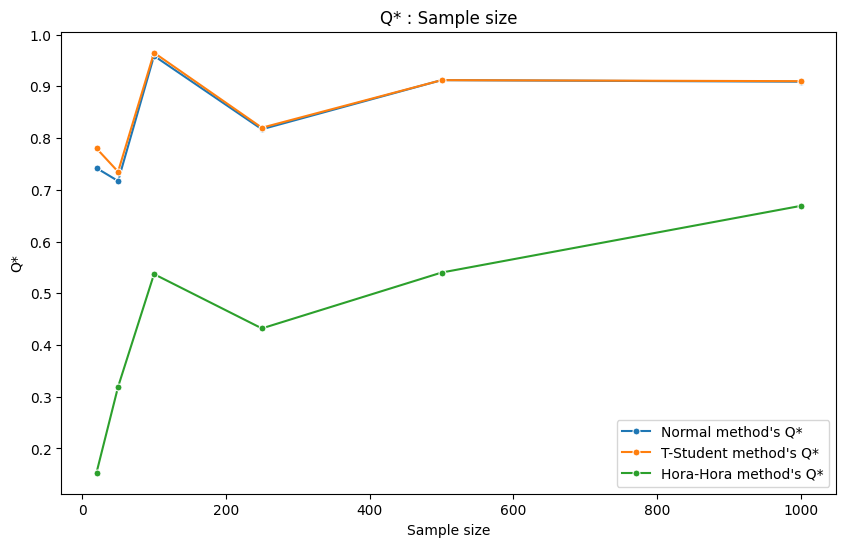

In [114]:
get_method_info(lambda size : stats.expon(scale=1, loc=-1).rvs(size=size, random_state=gen()))